In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DF 불러오기

In [4]:
df0 = pd.read_csv('./after_preprocessing_data/df_all_0629.csv')
df0

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536092,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.0,250000
536093,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.2,138000
536094,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.0,172000
536095,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.4,37000


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536097 entries, 0 to 536096
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   자치구                536097 non-null  object 
 1   계약일                536097 non-null  object 
 2   건물면적(㎡)            536097 non-null  float64
 3   층                  536097 non-null  int64  
 4   KOSPI종가            536097 non-null  float64
 5   Fed기준금리            536097 non-null  float64
 6   국제유가(Dubai)($/배럴)  536097 non-null  float64
 7   부동산거래량             536097 non-null  int64  
 8   국고채5년(평균)          536097 non-null  float64
 9   국고채10년(평균)         536097 non-null  float64
 10  회사채3년(평균)          536097 non-null  float64
 11  CD91물(평균)          536097 non-null  float64
 12  BOK기준금리            536097 non-null  float64
 13  건물연식               536097 non-null  int64  
 14  GDP대비가계부채비율        536097 non-null  float64
 15  환율종가               536097 non-null  float64
 16  선행

In [6]:
df0['금값종가'] = df0['금값종가'].str.replace(',', '').astype('float')

## LTV 컬럼 추가 
- 계약일 
- 거래가격(=물건금액)
> 2가지 조건을 고려하여 LTV 값 대입 

- 서울
    - 투기과열지구 : 서울 전역 포함(17.08.02 ~ 23.01)
    - 서울 내에서 투기지역 구분 의미 X 

- 고려하지 못한 조건
    - 소득
    - 주택 소유 및 다주택 여부 
    

# Train/Test Split


In [7]:
# Train : 2016-2020
# Test : 2021-2022

df0['계약일'] = pd.to_datetime(df0['계약일'])

In [8]:
train_df = df0.loc[df0['계약일'] < '2021']

In [9]:
test_df = df0.loc[df0['계약일'] >= '2021']

## feature & target split

In [10]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [11]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

---

# Scaling
1. Features - minMax
2. Target - Log 

In [12]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

453170    4.716003
453171    4.722634
453172    4.380211
453173    5.079181
453174    4.361728
            ...   
536092    5.397940
536093    5.139879
536094    5.235528
536095    4.568202
536096    4.883661
Name: 물건금액(만원), Length: 82927, dtype: float64

# OLS - Scaling 후

## OLS_1

In [14]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 2.582e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:46:09   Log-Likelihood:             1.3125e+05
No. Observations:              453170   AIC:                        -2.625e+05
Df Residuals:                  453150   BIC:                        -2.622e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6089      0.008    550.352      0.000       4.592       4.625
건물면적(㎡)               2.2003      0.004    584.433      0.000       2.193       2.208
층                     0.2745      0.003     84.702      0.000       0.268       0.281
KOSPI종가               0.0245      0.007      3.762      0.000       0.012       0.037
Fed기준금리              -0.1347      0.004    -35.789      0.000      -0.142      -0.127
국제유가(Dubai)($/배럴)     0.1407      0.004     37.917      0.000       0.133       0.148
부동산거래량                0.0139      0.002      7.017      0.000       0.010       0.018
국고채5년(평균)            -0.3033      0.020    -15.210      0.000      -0.342      -0.264
국고채10년(평균)            0.2631      0.015     18.017      0.000       0.234       0.292
회사채3년(평균)             0.1205      0.006     20.605      0.000       0.109       0.132
CD91물(평균)            -0.0680      0.009     -7.952      0.000      -0.085      -0.051
BOK기준금리              -0.0937      0.007    -13.128      0.000      -0.108      -0.080
건물연식                 -0.0047      0.002     -2.689      0.007      -0.008      -0.001
GDP대비가계부채비율          -0.0313      0.006     -5.138      0.000      -0.043      -0.019
환율종가                  0.0174      0.003      5.478      0.000       0.011       0.024
선행지수순환변동치             0.1224      0.005     25.823      0.000       0.113       0.132
EPU                  -0.0123      0.002     -6.301      0.000      -0.016      -0.009
장단기금리spread          -0.2422      0.009    -26.906      0.000      -0.260      -0.225
금값종가                 -0.0345      0.006     -5.801      0.000      -0.046      -0.023
LTV                  -0.2774      0.002   -130.555      0.000      -0.282      -0.273
==============================================================================
Omnibus:                    10917.420   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12453.145
Skew:                           0.347   Prob(JB):                         0.00
Kurtosis:                       3.420   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X_scaled.drop(['국고채5년(평균)', '회사채3년(평균)', 'CD91물(평균)'], axis=1, inplace=True)

In [16]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 3.054e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:46:10   Log-Likelihood:             1.3078e+05
No. Observations:              453170   AIC:                        -2.615e+05
Df Residuals:                  453153   BIC:                        -2.613e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5780      0.006    743.910      0.000       4.566       4.590
건물면적(㎡)               2.2039      0.004    585.099      0.000       2.197       2.211
층                     0.2746      0.003     84.650      0.000       0.268       0.281
KOSPI종가               0.1024      0.006     17.732      0.000       0.091       0.114
Fed기준금리              -0.1683      0.004    -47.409      0.000      -0.175      -0.161
국제유가(Dubai)($/배럴)     0.1330      0.004     36.007      0.000       0.126       0.140
부동산거래량               -0.0022      0.002     -1.157      0.247      -0.006       0.002
국고채10년(평균)            0.0984      0.005     17.992      0.000       0.088       0.109
BOK기준금리              -0.1786      0.005    -33.201      0.000      -0.189      -0.168
건물연식                 -0.0046      0.002     -2.655      0.008      -0.008      -0.001
GDP대비가계부채비율           0.0280      0.006      4.936      0.000       0.017       0.039
환율종가                  0.0431      0.003     14.668      0.000       0.037       0.049
선행지수순환변동치             0.0895      0.003     27.992      0.000       0.083       0.096
EPU                  -0.0257      0.002    -13.703      0.000      -0.029      -0.022
장단기금리spread          -0.2381      0.006    -40.587      0.000      -0.250      -0.227
금값종가                 -0.0488      0.006     -8.506      0.000      -0.060      -0.038
LTV                  -0.2616      0.002   -127.162      0.000      -0.266      -0.258
==============================================================================
Omnibus:                    11141.212   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12688.737
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       3.418   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

In [18]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 3.258e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:46:11   Log-Likelihood:             1.3077e+05
No. Observations:              453170   AIC:                        -2.615e+05
Df Residuals:                  453154   BIC:                        -2.613e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5773      0.006    746.842      0.000       4.565       4.589
건물면적(㎡)               2.2039      0.004    585.107      0.000       2.196       2.211
층                     0.2747      0.003     84.656      0.000       0.268       0.281
KOSPI종가               0.1017      0.006     17.711      0.000       0.090       0.113
Fed기준금리              -0.1684      0.004    -47.460      0.000      -0.175      -0.161
국제유가(Dubai)($/배럴)     0.1321      0.004     36.578      0.000       0.125       0.139
국고채10년(평균)            0.1002      0.005     19.170      0.000       0.090       0.110
BOK기준금리              -0.1778      0.005    -33.330      0.000      -0.188      -0.167
건물연식                 -0.0046      0.002     -2.645      0.008      -0.008      -0.001
GDP대비가계부채비율           0.0278      0.006      4.895      0.000       0.017       0.039
환율종가                  0.0426      0.003     14.646      0.000       0.037       0.048
선행지수순환변동치             0.0899      0.003     28.255      0.000       0.084       0.096
EPU                  -0.0250      0.002    -13.951      0.000      -0.029      -0.022
장단기금리spread          -0.2393      0.006    -41.515      0.000      -0.251      -0.228
금값종가                 -0.0480      0.006     -8.427      0.000      -0.059      -0.037
LTV                  -0.2621      0.002   -129.762      0.000      -0.266      -0.258
==============================================================================
Omnibus:                    11152.402   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12702.487
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       3.418   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [20]:
# VIF_3
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.240252            건물면적(㎡)
1     5.072120                  층
2   128.429786            KOSPI종가
3    45.706055            Fed기준금리
4    62.736808  국제유가(Dubai)($/배럴)
5    83.693479         국고채10년(평균)
6    70.625255            BOK기준금리
7     5.575733               건물연식
8    84.309029        GDP대비가계부채비율
9    17.128596               환율종가
10   54.138840          선행지수순환변동치
11    4.735220                EPU
12  115.230577        장단기금리spread
13   62.749177               금값종가
14   20.196668                LTV


In [21]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

In [22]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 3.486e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:46:26   Log-Likelihood:             1.3062e+05
No. Observations:              453170   AIC:                        -2.612e+05
Df Residuals:                  453155   BIC:                        -2.610e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5999      0.006    767.118      0.000       4.588       4.612
건물면적(㎡)               2.2032      0.004    584.762      0.000       2.196       2.211
층                     0.2746      0.003     84.606      0.000       0.268       0.281
Fed기준금리              -0.1693      0.004    -47.682      0.000      -0.176      -0.162
국제유가(Dubai)($/배럴)     0.1386      0.004     38.566      0.000       0.132       0.146
국고채10년(평균)            0.1134      0.005     21.907      0.000       0.103       0.124
BOK기준금리              -0.1738      0.005    -32.607      0.000      -0.184      -0.163
건물연식                 -0.0045      0.002     -2.552      0.011      -0.008      -0.001
GDP대비가계부채비율           0.0417      0.006      7.405      0.000       0.031       0.053
환율종가                  0.0283      0.003     10.123      0.000       0.023       0.034
선행지수순환변동치             0.1251      0.002     50.404      0.000       0.120       0.130
EPU                  -0.0315      0.002    -17.904      0.000      -0.035      -0.028
장단기금리spread          -0.2476      0.006    -43.076      0.000      -0.259      -0.236
금값종가                 -0.0148      0.005     -2.752      0.006      -0.025      -0.004
LTV                  -0.2688      0.002   -135.473      0.000      -0.273      -0.265
==============================================================================
Omnibus:                    11095.151   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12643.634
Skew:                           0.351   Prob(JB):                         0.00
Kurtosis:                       3.419   Cond. No.                         71.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# VIF_4
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.236249            건물면적(㎡)
1     5.069704                  층
2    45.609654            Fed기준금리
3    61.898778  국제유가(Dubai)($/배럴)
4    83.487135         국고채10년(평균)
5    63.299512            BOK기준금리
6     5.571365               건물연식
7    80.065153        GDP대비가계부채비율
8    16.444289               환율종가
9    30.708697          선행지수순환변동치
10    4.594532                EPU
11  115.165446        장단기금리spread
12   53.955005               금값종가
13   20.029906                LTV


In [24]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'AppleGothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.draw()
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.draw()
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 13217 (\N{SQUARE M SQ

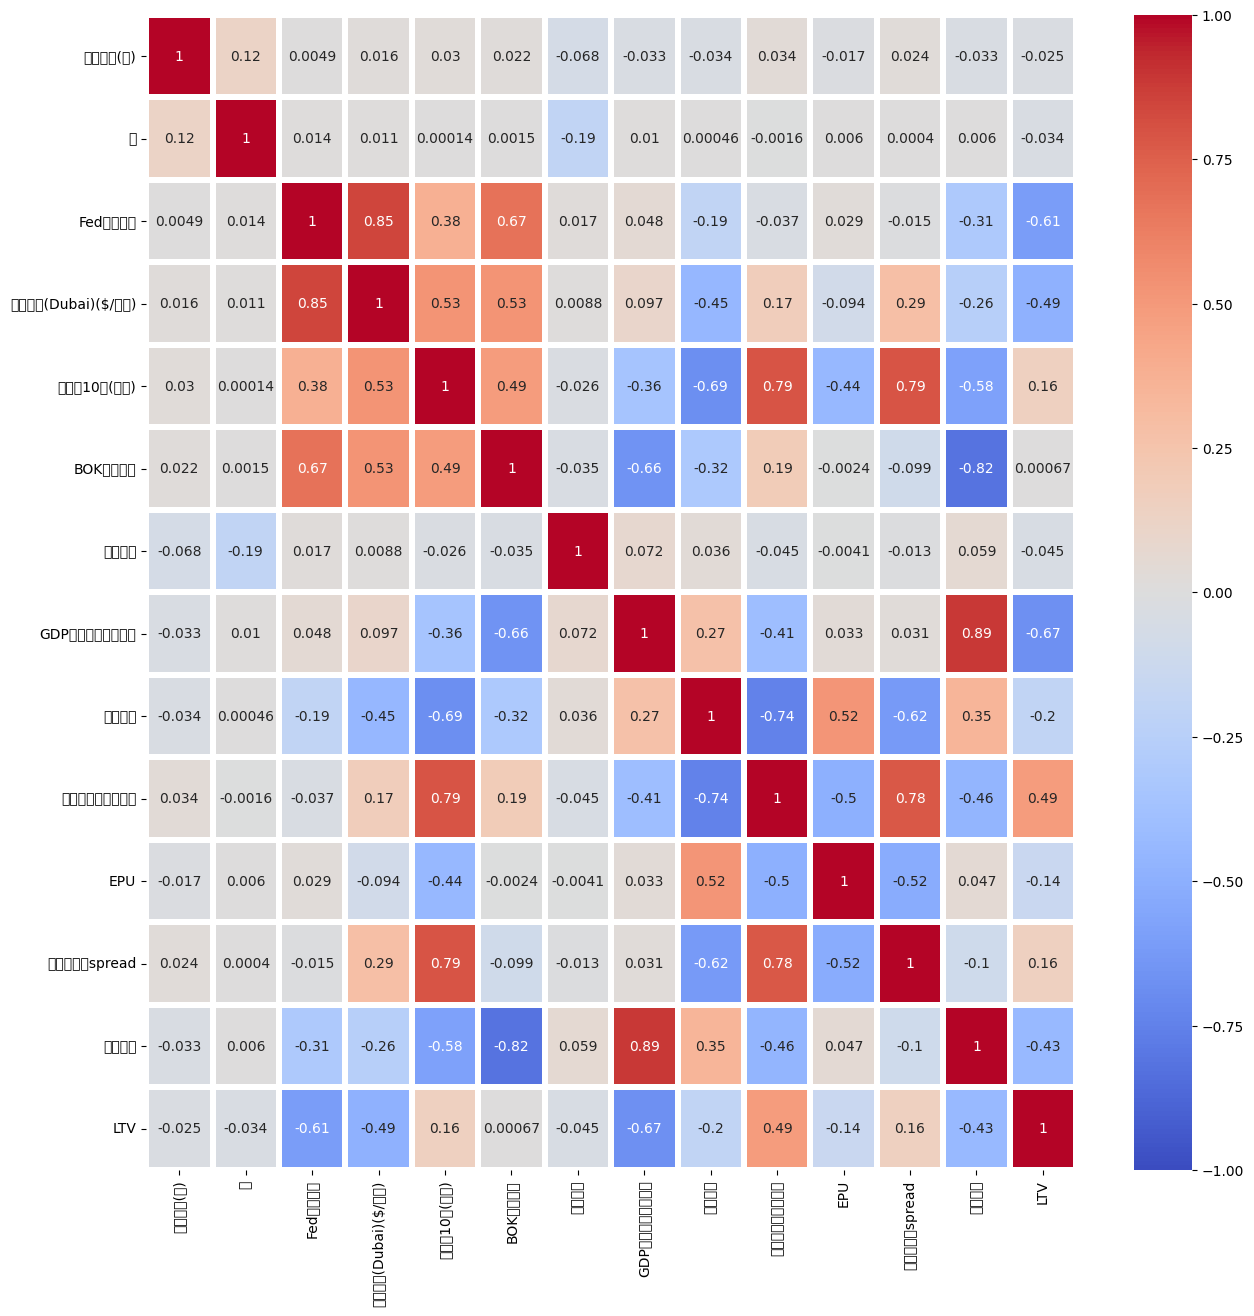

In [25]:
plot_cor(X_scaled)

In [26]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

In [27]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                 3.746e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:46:42   Log-Likelihood:             1.3038e+05
No. Observations:              453170   AIC:                        -2.607e+05
Df Residuals:                  453156   BIC:                        -2.606e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5390      0.005    853.890      0.000       4.529       4.549
건물면적(㎡)               2.2043      0.004    584.773      0.000       2.197       2.212
층                     0.2750      0.003     84.689      0.000       0.269       0.281
Fed기준금리              -0.1576      0.004    -44.880      0.000      -0.164      -0.151
국제유가(Dubai)($/배럴)     0.1232      0.004     34.941      0.000       0.116       0.130
BOK기준금리              -0.1043      0.004    -24.337      0.000      -0.113      -0.096
건물연식                 -0.0037      0.002     -2.128      0.033      -0.007      -0.000
GDP대비가계부채비율           0.0666      0.006     12.074      0.000       0.056       0.077
환율종가                  0.0357      0.003     12.856      0.000       0.030       0.041
선행지수순환변동치             0.1327      0.002     53.923      0.000       0.128       0.137
EPU                  -0.0315      0.002    -17.911      0.000      -0.035      -0.028
장단기금리spread          -0.1354      0.003    -51.811      0.000      -0.141      -0.130
금값종가                 -0.0371      0.005     -7.017      0.000      -0.047      -0.027
LTV                  -0.2607      0.002   -133.665      0.000      -0.265      -0.257
==============================================================================
Omnibus:                    11157.225   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12704.598
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       3.417   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# VIF_5
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.202760            건물면적(㎡)
1     5.056408                  층
2    42.667486            Fed기준금리
3    57.666646  국제유가(Dubai)($/배럴)
4    52.022907            BOK기준금리
5     5.564347               건물연식
6    79.962168        GDP대비가계부채비율
7    16.024125               환율종가
8    30.701957          선행지수순환변동치
9     4.569053                EPU
10   30.080192        장단기금리spread
11   47.290688               금값종가
12   19.913265                LTV


In [29]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

In [30]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                 4.048e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:46:52   Log-Likelihood:             1.3008e+05
No. Observations:              453170   AIC:                        -2.601e+05
Df Residuals:                  453157   BIC:                        -2.600e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4448      0.004   1219.672      0.000       4.438       4.452
건물면적(㎡)               2.2079      0.004    585.820      0.000       2.201       2.215
층                     0.2756      0.003     84.822      0.000       0.269       0.282
Fed기준금리              -0.2092      0.003    -74.689      0.000      -0.215      -0.204
국제유가(Dubai)($/배럴)     0.1174      0.004     33.343      0.000       0.110       0.124
건물연식                 -0.0041      0.002     -2.371      0.018      -0.008      -0.001
GDP대비가계부채비율           0.1520      0.004     35.720      0.000       0.144       0.160
환율종가                  0.0485      0.003     17.791      0.000       0.043       0.054
선행지수순환변동치             0.1392      0.002     56.873      0.000       0.134       0.144
EPU                  -0.0261      0.002    -14.947      0.000      -0.030      -0.023
장단기금리spread          -0.1263      0.003    -48.783      0.000      -0.131      -0.121
금값종가                 -0.0347      0.005     -6.567      0.000      -0.045      -0.024
LTV                  -0.2502      0.002   -131.453      0.000      -0.254      -0.246
==============================================================================
Omnibus:                    11278.518   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12873.716
Skew:                           0.355   Prob(JB):                         0.00
Kurtosis:                       3.423   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# VIF_7
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.089014            건물면적(㎡)
1     4.985867                  층
2    25.793333            Fed기준금리
3    52.131100  국제유가(Dubai)($/배럴)
4     5.461955               건물연식
5    49.150365        GDP대비가계부채비율
6    14.215424               환율종가
7    30.427494          선행지수순환변동치
8     4.567709                EPU
9    30.052928        장단기금리spread
10   39.387097               금값종가
11   18.662470                LTV


In [32]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

In [33]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 4.395e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:47:01   Log-Likelihood:             1.2953e+05
No. Observations:              453170   AIC:                        -2.590e+05
Df Residuals:                  453158   BIC:                        -2.589e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4879      0.003   1315.293      0.000       4.481       4.495
건물면적(㎡)         2.2111      0.004    586.148      0.000       2.204       2.219
층               0.2757      0.003     84.752      0.000       0.269       0.282
Fed기준금리        -0.1489      0.002    -69.550      0.000      -0.153      -0.145
건물연식           -0.0046      0.002     -2.603      0.009      -0.008      -0.001
GDP대비가계부채비율     0.1790      0.004     42.816      0.000       0.171       0.187
환율종가            0.0039      0.002      1.637      0.102      -0.001       0.009
선행지수순환변동치       0.1156      0.002     49.279      0.000       0.111       0.120
EPU            -0.0132      0.002     -7.763      0.000      -0.017      -0.010
장단기금리spread    -0.0946      0.002    -39.237      0.000      -0.099      -0.090
금값종가           -0.0587      0.005    -11.183      0.000      -0.069      -0.048
LTV            -0.2421      0.002   -128.091      0.000      -0.246      -0.238
==============================================================================
Omnibus:                    11341.153   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12927.371
Skew:                           0.356   Prob(JB):                         0.00
Kurtosis:                       3.420   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X_scaled.drop('환율종가', axis=1, inplace=True)

In [35]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 4.835e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:47:02   Log-Likelihood:             1.2953e+05
No. Observations:              453170   AIC:                        -2.590e+05
Df Residuals:                  453159   BIC:                        -2.589e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4906      0.003   1518.933      0.000       4.485       4.496
건물면적(㎡)         2.2111      0.004    586.145      0.000       2.204       2.218
층               0.2758      0.003     84.773      0.000       0.269       0.282
Fed기준금리        -0.1498      0.002    -72.586      0.000      -0.154      -0.146
건물연식           -0.0045      0.002     -2.578      0.010      -0.008      -0.001
GDP대비가계부채비율     0.1807      0.004     44.654      0.000       0.173       0.189
선행지수순환변동치       0.1140      0.002     53.515      0.000       0.110       0.118
EPU            -0.0126      0.002     -7.590      0.000      -0.016      -0.009
장단기금리spread    -0.0950      0.002    -39.572      0.000      -0.100      -0.090
금값종가           -0.0608      0.005    -11.942      0.000      -0.071      -0.051
LTV            -0.2419      0.002   -128.199      0.000      -0.246      -0.238
==============================================================================
Omnibus:                    11336.271   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12920.868
Skew:                           0.356   Prob(JB):                         0.00
Kurtosis:                       3.420   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# VIF_7
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.890302      건물면적(㎡)
1    4.895861            층
2    6.010931      Fed기준금리
3    5.355659         건물연식
4   47.256958  GDP대비가계부채비율
5   24.097144    선행지수순환변동치
6    3.606935          EPU
7   24.432904  장단기금리spread
8   39.173902         금값종가
9   11.557006          LTV


In [37]:
X_scaled1 =X_scaled.drop('금값종가', axis=1)

In [38]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled1, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 5.369e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:47:07   Log-Likelihood:             1.2945e+05
No. Observations:              453170   AIC:                        -2.589e+05
Df Residuals:                  453160   BIC:                        -2.588e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4736      0.003   1727.044      0.000       4.469       4.479
건물면적(㎡)         2.2116      0.004    586.202      0.000       2.204       2.219
층               0.2757      0.003     84.743      0.000       0.269       0.282
Fed기준금리        -0.1337      0.002    -85.557      0.000      -0.137      -0.131
건물연식           -0.0043      0.002     -2.483      0.013      -0.008      -0.001
GDP대비가계부채비율     0.1388      0.002     68.987      0.000       0.135       0.143
선행지수순환변동치       0.1137      0.002     53.386      0.000       0.110       0.118
EPU            -0.0087      0.002     -5.361      0.000      -0.012      -0.006
장단기금리spread    -0.0867      0.002    -37.726      0.000      -0.091      -0.082
LTV            -0.2392      0.002   -127.676      0.000      -0.243      -0.236
==============================================================================
Omnibus:                    11485.945   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13096.700
Skew:                           0.359   Prob(JB):                         0.00
Kurtosis:                       3.421   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# VIF_8
vif = feature_engineering_XbyVIF(X_scaled1)
print(vif)

   VIF_Factor      Feature
0    5.758934      건물면적(㎡)
1    4.822821            층
2    4.469608      Fed기준금리
3    5.283255         건물연식
4    6.035898  GDP대비가계부채비율
5   24.067524    선행지수순환변동치
6    3.604736          EPU
7   23.457674  장단기금리spread
8    9.812007          LTV


In [40]:
X_scaled2 =X_scaled1.drop('선행지수순환변동치', axis=1)

In [41]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled2, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                 5.967e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:47:12   Log-Likelihood:             1.2803e+05
No. Observations:              453170   AIC:                        -2.560e+05
Df Residuals:                  453161   BIC:                        -2.560e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4610      0.003   1723.977      0.000       4.456       4.466
건물면적(㎡)         2.2205      0.004    587.324      0.000       2.213       2.228
층               0.2786      0.003     85.384      0.000       0.272       0.285
Fed기준금리        -0.1075      0.001    -72.217      0.000      -0.110      -0.105
건물연식           -0.0063      0.002     -3.580      0.000      -0.010      -0.003
GDP대비가계부채비율     0.1168      0.002     59.122      0.000       0.113       0.121
EPU            -0.0243      0.002    -15.144      0.000      -0.027      -0.021
장단기금리spread     0.0114      0.001      8.199      0.000       0.009       0.014
LTV            -0.2005      0.002   -115.698      0.000      -0.204      -0.197
==============================================================================
Omnibus:                    11595.686   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13147.797
Skew:                           0.364   Prob(JB):                         0.00
Kurtosis:                       3.408   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# VIF_8
vif = feature_engineering_XbyVIF(X_scaled2)
print(vif)

   VIF_Factor      Feature
0    5.757326      건물면적(㎡)
1    4.822662            층
2    3.903127      Fed기준금리
3    5.272506         건물연식
4    5.174834  GDP대비가계부채비율
5    3.430280          EPU
6    8.541119  장단기금리spread
7    7.337253          LTV


In [43]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled2, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')

Average Cross-Validated RMSE: 0.191
교차검증별 MSE : [0.0294 0.0315 0.0347 0.0458 0.042 ]
교차검증 평균 MSE : 0.03665


In [44]:
X_scaled2.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '건물연식', 'GDP대비가계부채비율', 'EPU', '장단기금리spread',
       'LTV'],
      dtype='object')

In [45]:
X_test_scaled=X_test_scaled[X_scaled2.columns]

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled2, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.045819089740831064, RMSE :  0.214, MAE: 0.214
Variance score :  0.626


MSE : 0.04301200513418364, RMSE :  0.207, MAE: 0.207
Variance score :  0.649


MSE : 0.04252702064219838, RMSE :  0.206, MAE: 0.206
Variance score :  0.653


MSE : 0.04195584402675528, RMSE :  0.205, MAE: 0.205
Variance score :  0.657


MSE : 0.06009457195283385, RMSE :  0.245, MAE: 0.245
Variance score :  0.509




In [47]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[3].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.04195584402675528, RMSE :  0.205, MAE: 0.205
Variance score :  0.657


In [48]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[3].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),2.163109
1,층,0.257225
4,GDP대비가계부채비율,0.055604
6,장단기금리spread,0.004026
3,건물연식,-0.001822
5,EPU,-0.020057
2,Fed기준금리,-0.123394
7,LTV,-0.280595


___

# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [51]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

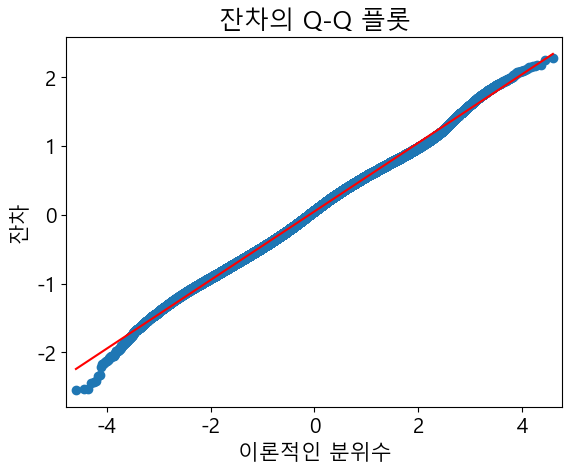

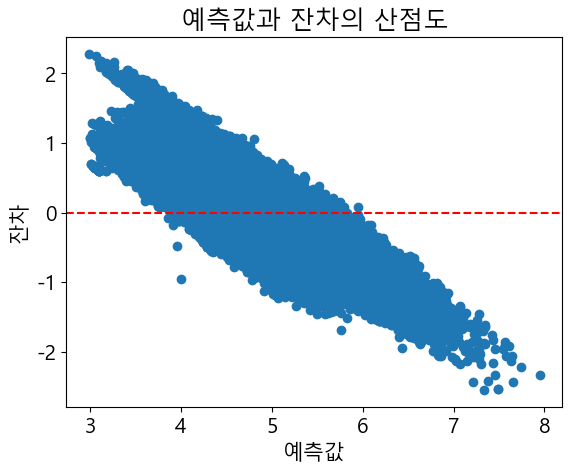

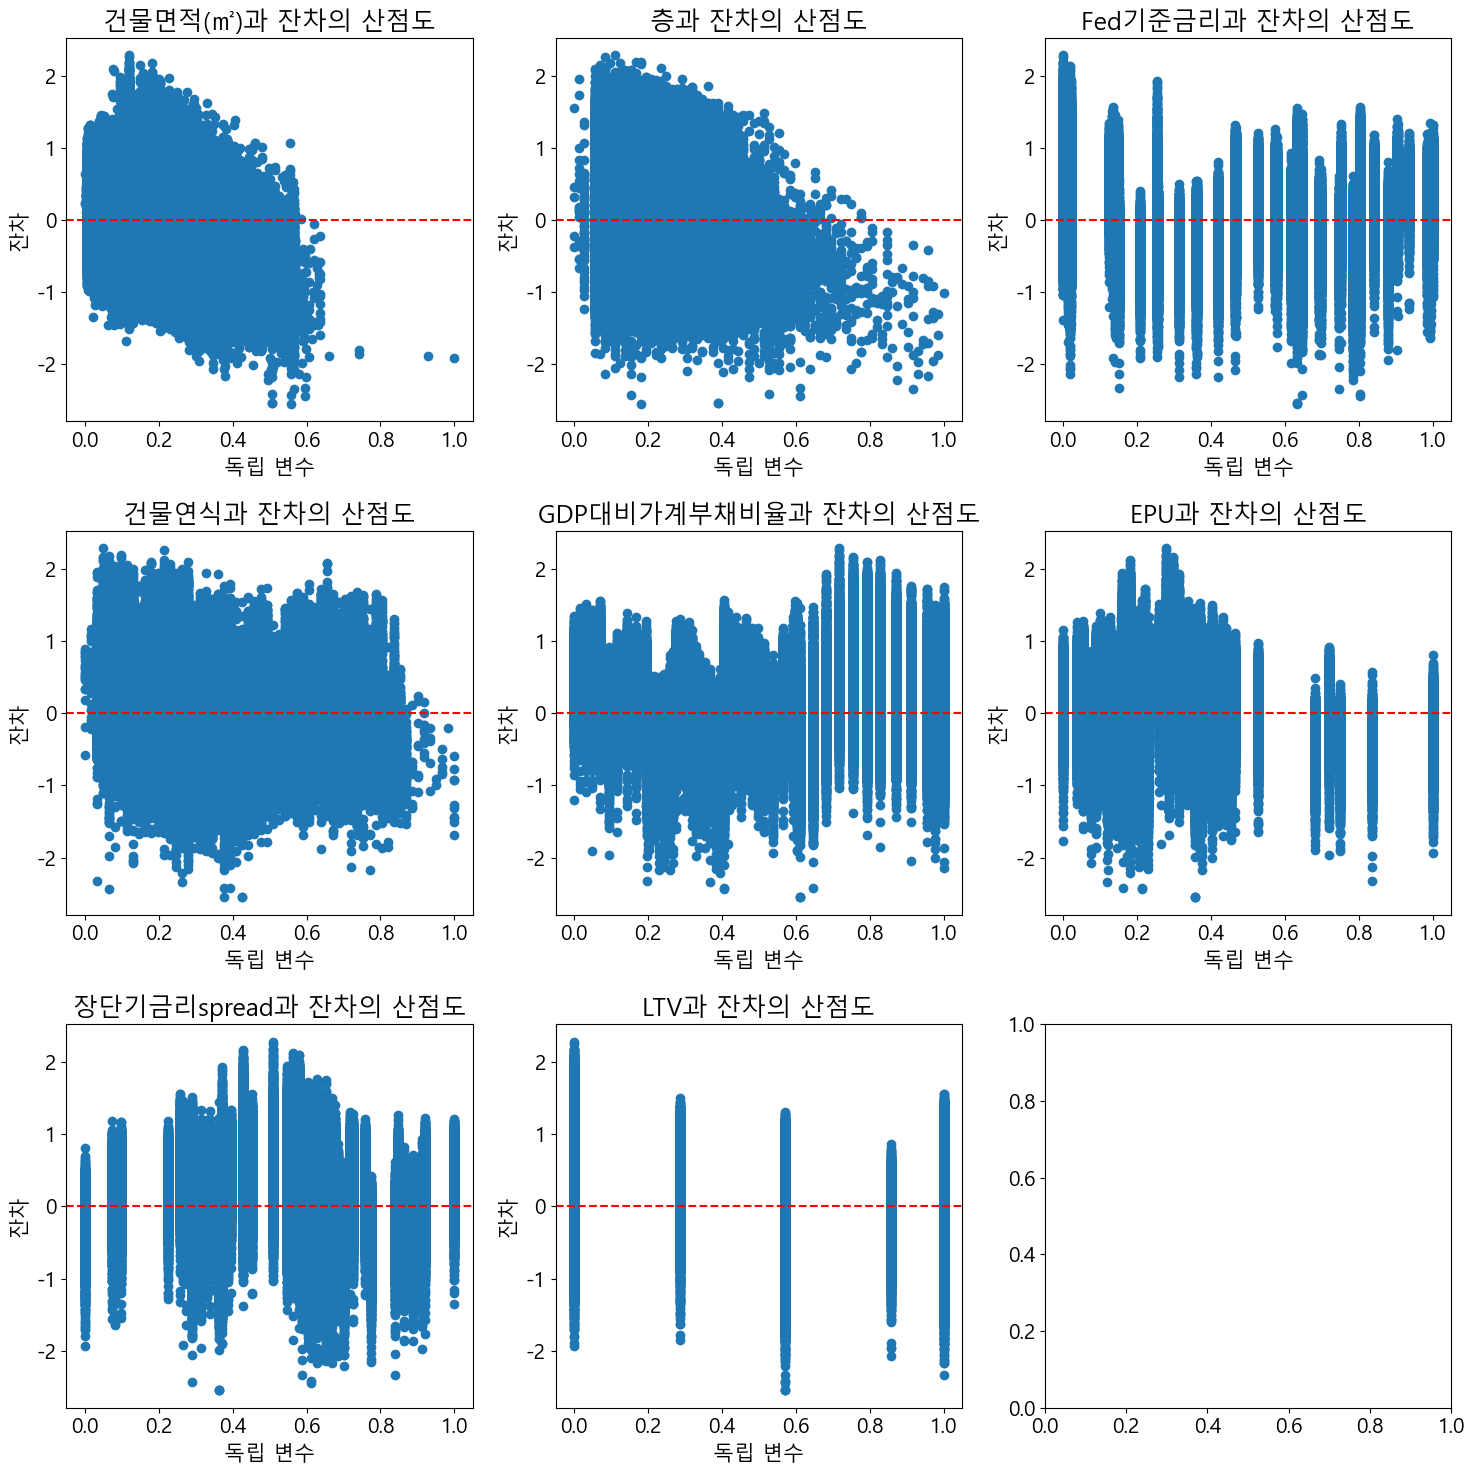

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled2
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()